# Teste de Regressão
## MinMaxScaler para normalização dos dados
## SMOTE para data augmentation

### Próximos passos:
- Arrumar variáveis categóricas para 0 e 1 após o resample
- Adicionar o cosine similarity
https://discuss.pytorch.org/t/underrstanding-cosine-similarity-function-in-pytorch/29865

https://www.programcreek.com/python/example/104435/torch.nn.functional.cosine_similarity

In [1]:
! pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\programdata\miniconda3\lib\site-packages (0.5.0)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from collections import Counter
#from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [3]:
data = pd.read_pickle("data_closed_rigid_o")
data

,Age,AgeGroup,Gender,Height,Weight,BMI,FootLen,Ystudy,Illness,Nmedication,...,Internal fixation in the medulla,Internal fixation in the knee,Corrective lens,Prosthesis aortic valve,Dental_total,Support_total,Hearing_total,Internal fixation in the toe_foot_total,Orthosis in the knee_total,PF50_closed_rigid
0,33.000000,0,1,157.5,54.20,21.849332,21.80,17,1,1,...,0,0,1,0,0,0,0,0,0,0.200000
1,27.583333,0,1,154.0,44.00,18.552876,22.45,17,0,0,...,0,0,0,0,0,0,0,0,0,0.133333
2,36.916667,0,0,161.7,63.40,24.247626,23.10,11,0,0,...,0,0,0,0,1,0,0,0,0,0.133333
3,61.750000,1,0,164.0,68.35,25.412701,24.70,1,0,0,...,0,0,0,0,1,0,0,0,0,0.144444
4,49.333333,0,0,163.5,70.65,26.428752,23.70,10,0,1,...,0,0,1,0,1,0,0,0,0,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,24.170000,0,1,161.0,51.70,19.950000,22.50,16,0,0,...,0,0,1,0,0,0,0,0,1,0.077778
203,27.750000,0,0,172.0,101.80,34.290000,24.05,15,1,0,...,0,0,1,0,0,0,0,0,0,0.244444
204,34.170000,0,1,156.0,53.45,21.820000,22.00,15,1,0,...,0,0,1,0,0,0,0,0,0,0.122222
205,37.920000,0,0,155.0,69.55,28.950000,22.35,25,0,0,...,0,0,1,0,0,0,0,0,0,0.266667


In [4]:
pf50 = data["PF50_closed_rigid"].values
#pf50

In [5]:
#plt.plot(pf50)
#plt.show()

In [6]:
#plt.boxplot(pf50)

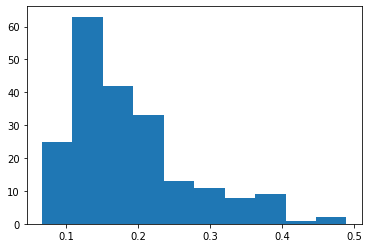

In [7]:
n, bins, patches = plt.hist(pf50)

In [8]:
X = data.drop(columns=["PF50_closed_rigid"]).values
y = pf50.reshape(len(pf50), 1)

In [9]:
# Separando o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [10]:
X_train

array([[70.41666666666667, '1', '1', ..., 0, 0, 0],
       [23.66666666666667, '0', '1', ..., 0, 0, 0],
       [28.42, '0', '1', ..., 0, 0, 0],
       ...,
       [27.33333333333333, '0', '0', ..., 0, 0, 0],
       [62.17, '1', '0', ..., 0, 0, 0],
       [63.16666666666666, '1', '1', ..., 1, 0, 0]], dtype=object)

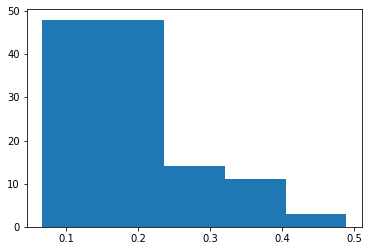

In [11]:
# Histograma dos dados de treino
nbins = 5
n, bins, patches = plt.hist(y_train, nbins)

In [12]:
# Indica qual o bin correspondente para cada dado
indices = np.digitize(y_train, bins)

# Arrumar o caso do último valor que não é incluído no último bin
indices[indices>nbins]=nbins
indices = indices.reshape(len(indices),)
#indices

In [13]:
n

array([48., 48., 14., 11.,  3.])

## Usando o SMOTE
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

In [15]:
data_train = np.hstack([X_train, y_train])
data_train.shape

(124, 184)

In [16]:
sm = SMOTE(k_neighbors=np.int(n.min()-1), random_state=42)
data_train_res, indices_res = sm.fit_resample(data_train, indices)

In [17]:
data_train_res.shape

(240, 184)

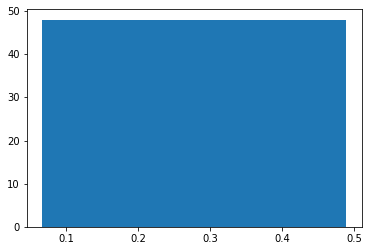

In [18]:
# Histograma dos dados de treino resample
nbins = 5
n_res, bins_res, patches_res = plt.hist(data_train_res[:,-1], nbins)

In [19]:
n_res

array([48., 48., 48., 48., 48.])

In [20]:
# Colocando 
X_train = data_train_res[:,0:-1]
y_train = data_train_res[:,-1].reshape(data_train_res.shape[0],1)

In [35]:
# Arrumar os 0 e 1 nos parametros quali
X_train[-1]

array([ 66.76590938,   0.79017554,   0.        , 175.77228203,
        71.94796576,  23.28358028,  25.67543885,   9.25894676,
         1.        ,   3.37052662,   1.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.79017554,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.20982446,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.79017554,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.79017554,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.79017554,   0.        ,   0.        ,   0.  

In [22]:
# Ajustando o escalamento ao dado de TREINAMENTO (fit) e transformando o dado de treinamento
scaler_x = MinMaxScaler()
X_train_scaled = scaler_x.fit_transform(X_train)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)

In [23]:
#torch.manual_seed(1234)

In [24]:
# N = 1 # Batch size
D_in = X.shape[1] # Input dimension
D_out = 1 # Output dimension 
hidden_units = 3

In [25]:
class Net(nn.Module):
    def __init__(self, D_in, D_out):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(D_in, 12)
        self.fc2 = nn.Linear(12, 6)
        self.fc3 = nn.Linear(6, 2)
        self.fc4 = nn.Linear(2, D_out)
        
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = self.fc4(x)
        return(x)

net = Net(D_in, D_out)

In [26]:
# Choose optmizer and loss function
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.05, momentum = 0.9) # lr = learning rate 

In [27]:
# Treinamento utilizando o dado de treino transformado
epochs = 1000
lossr = np.zeros(epochs)

for epoch in range(epochs):
    inputs = torch.autograd.Variable(torch.Tensor(X_train_scaled.astype(np.float32)).float())
    targets = torch.autograd.Variable(torch.Tensor(y_train_scaled.astype(np.float32)).float())
    
    optimizer.zero_grad()
    out = net(inputs)
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()
    
    lossr[epoch] = loss.item()
    
    if epoch == 0 or (epoch + 1) % 10 == 0:
        print('Epoch %d Loss: %.4f' % (epoch + 1, loss.item()))

Epoch 1 Loss: 0.0972
Epoch 10 Loss: 0.0852
Epoch 20 Loss: 0.0774
Epoch 30 Loss: 0.0708
Epoch 40 Loss: 0.0568
Epoch 50 Loss: 0.0380
Epoch 60 Loss: 0.0312
Epoch 70 Loss: 0.0259
Epoch 80 Loss: 0.0230
Epoch 90 Loss: 0.0202
Epoch 100 Loss: 0.0180
Epoch 110 Loss: 0.0160
Epoch 120 Loss: 0.0142
Epoch 130 Loss: 0.0127
Epoch 140 Loss: 0.0113
Epoch 150 Loss: 0.0101
Epoch 160 Loss: 0.0092
Epoch 170 Loss: 0.0084
Epoch 180 Loss: 0.0077
Epoch 190 Loss: 0.0072
Epoch 200 Loss: 0.0068
Epoch 210 Loss: 0.0064
Epoch 220 Loss: 0.0061
Epoch 230 Loss: 0.0058
Epoch 240 Loss: 0.0056
Epoch 250 Loss: 0.0054
Epoch 260 Loss: 0.0052
Epoch 270 Loss: 0.0050
Epoch 280 Loss: 0.0049
Epoch 290 Loss: 0.0047
Epoch 300 Loss: 0.0046
Epoch 310 Loss: 0.0045
Epoch 320 Loss: 0.0044
Epoch 330 Loss: 0.0043
Epoch 340 Loss: 0.0043
Epoch 350 Loss: 0.0042
Epoch 360 Loss: 0.0041
Epoch 370 Loss: 0.0041
Epoch 380 Loss: 0.0040
Epoch 390 Loss: 0.0040
Epoch 400 Loss: 0.0039
Epoch 410 Loss: 0.0039
Epoch 420 Loss: 0.0038
Epoch 430 Loss: 0.0038

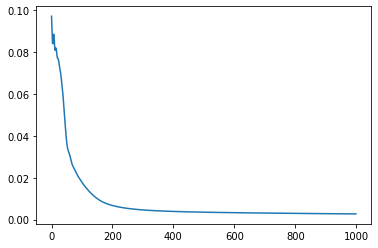

In [28]:
epoch = np.arange(0, epochs)
plt.plot(epoch,lossr)
plt.show()

In [29]:
# Transformando o dado de teste
X_test_scaled = scaler_x.fit_transform(X_test)
y_test_scaled = scaler_y.fit_transform(y_test)

In [30]:
# Avaliando a acurácia do modelo utilizando os dados de teste transformados
inputs = torch.autograd.Variable(torch.Tensor(X_test_scaled.astype(np.float32)).float())
targets = torch.autograd.Variable(torch.Tensor(y_test_scaled.astype(np.float32)).float())

optimizer.zero_grad()
out = net(inputs)
loss = criterion(out, targets)
loss.backward()
optimizer.step()

predicted = out.data

print('Teste Loss: %.4f' % (loss.item()))

Teste Loss: 0.1324


In [36]:
# Implementar o Cosine Similarity

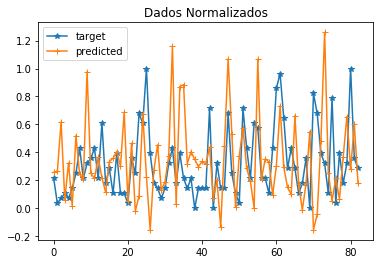

In [31]:
ninput = np.arange(len(X_test))
plt.figure()
plt.plot(ninput, y_test_scaled, '-*', label = 'target')
plt.plot(ninput, predicted.numpy(), '-+', label = 'predicted')
plt.title('Dados Normalizados')
plt.legend()
plt.show()

In [32]:
# Fazendo a transformação inversa para desnormalizar o dado de teste
predicted_desnorm = scaler_y.inverse_transform(predicted.numpy())
target_desnorm = scaler_y.inverse_transform(y_test_scaled)

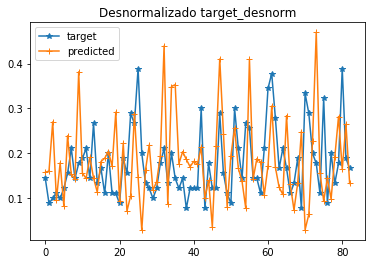

In [33]:
plt.figure()
plt.plot(ninput, target_desnorm, '-*', label = 'target')
plt.plot(ninput, predicted_desnorm, '-+', label = 'predicted')
plt.title('Desnormalizado target_desnorm')
plt.legend()
plt.show()